In [4]:
from large_gcs.algorithms.gcs_astar_reachability import GcsAstarReachability
from large_gcs.cost_estimators.shortcut_edge_ce import ShortcutEdgeCE
from large_gcs.graph.contact_cost_constraint_factory import (
    contact_shortcut_edge_cost_factory_over_obj_weighted,
)
from large_gcs.graph.cost_constraint_factory import (
    shortcut_edge_cost_factory,
)
from large_gcs.algorithms.search_algorithm import SearchNode
from large_gcs.graph.graph import ShortestPathSolution
from large_gcs.graph.incremental_contact_graph import IncrementalContactGraph
from large_gcs.graph_generators.contact_graph_generator import ContactGraphGeneratorParams

import numpy as np
from IPython.display import HTML

import logging

logging.basicConfig(level=logging.WARN)
logging.getLogger("large_gcs").setLevel(logging.INFO)
logging.getLogger(__name__).setLevel(logging.DEBUG)
logger = logging.getLogger(__name__)

INFO:large_gcs.graph.contact_graph:Creating vertex costs...
100%|██████████| 2/2 [00:00<00:00, 25497.29it/s]
INFO:large_gcs.graph.graph:Adding 2 vertices to graph...
100%|██████████| 2/2 [00:00<00:00, 18808.54it/s]
INFO:large_gcs.graph.contact_graph:Generating contact pair modes for 5 body pairs...
100%|██████████| 5/5 [00:00<00:00, 48.61it/s]
INFO:large_gcs.graph.incremental_contact_graph:Calculating adjacent contact pair modes (257)
100%|██████████| 257/257 [00:00<00:00, 598.20it/s]


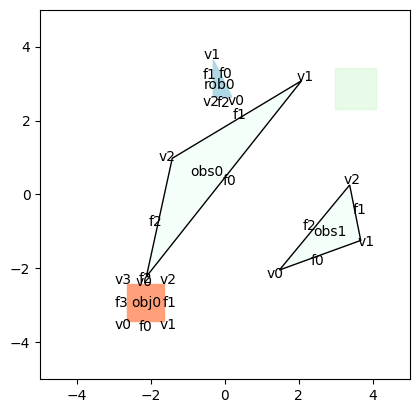

In [5]:
graph_file = ContactGraphGeneratorParams.inc_graph_file_path_from_name("cg_maze_a35")
cg = IncrementalContactGraph.load_from_file(
    graph_file,
    should_incl_simul_mode_switches=False,
    should_add_const_edge_cost=True,
    should_add_gcs=True,
)
cg.plot()

In [105]:
vertex_path = [
    'source',
    "('NC|obs0_v0-obj0_f2', 'NC|obs0_f1-rob0_v0', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'NC|obj0_f1-rob0_f1')",
    "('NC|obs0_v0-obj0_f2', 'NC|obs0_f2-rob0_v0', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'NC|obj0_f1-rob0_f1')",
    "('NC|obs0_v0-obj0_f2', 'NC|obs0_f2-rob0_v0', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'NC|obj0_f2-rob0_f2')",
    "('NC|obs0_v0-obj0_f2', 'NC|obs0_v0-rob0_f0', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'NC|obj0_f2-rob0_f2')",
    "('NC|obs0_v0-obj0_f2', 'NC|obs0_v0-rob0_f0', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'NC|obj0_f3-rob0_v0')",
    "('NC|obs0_v0-obj0_f2', 'NC|obs0_v0-rob0_f0', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'IC|obj0_f3-rob0_v0')",
    "('NC|obs0_v0-obj0_f2', 'NC|obs0_v0-rob0_f0', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'IC|obj0_v0-rob0_f0')",
    "('NC|obs0_v0-obj0_f2', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'IC|obj0_v0-rob0_f0')",
    "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'IC|obj0_v0-rob0_f0')",
    "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'IC|obj0_f0-rob0_v1')",
    "('IC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'IC|obj0_f0-rob0_v1')",
    "('IC|obs0_v1-obj0_f3', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'IC|obj0_f0-rob0_v1')",
    "('IC|obs0_v1-obj0_f3', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'IC|obj0_v0-rob0_f0')",
    "('NC|obs0_v1-obj0_f3', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'IC|obj0_v0-rob0_f0')",
    "('NC|obs0_v1-obj0_f3', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'IC|obj0_f3-rob0_v0')",
    "('NC|obs0_v1-obj0_f3', 'NC|obs0_v1-rob0_f1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'IC|obj0_f3-rob0_v0')",
    "('NC|obs0_v1-obj0_f3', 'NC|obs0_v1-rob0_f1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'IC|obj0_f2-rob0_f2')",
    'target',
    ]
cg.set_target('target')
for v in vertex_path:
    cg.generate_neighbors(v)
# cg.generate_neighbors(vertex_path[-1])
# cg.outgoing_edges(vertex_path[-1])


DEBUG:large_gcs.geometry.convex_set:Sampled 1 points from convex set
DEBUG:large_gcs.geometry.convex_set:Sampled 2 points from convex set
DEBUG:large_gcs.geometry.convex_set:Sampled 3 points from convex set
DEBUG:large_gcs.geometry.convex_set:Sampled 4 points from convex set
DEBUG:large_gcs.geometry.convex_set:Sampled 5 points from convex set
DEBUG:large_gcs.geometry.convex_set:Sampled 6 points from convex set
DEBUG:large_gcs.geometry.convex_set:Sampled 7 points from convex set
DEBUG:large_gcs.geometry.convex_set:Sampled 8 points from convex set
DEBUG:large_gcs.geometry.convex_set:Sampled 9 points from convex set
DEBUG:large_gcs.geometry.convex_set:Sampled 10 points from convex set
DEBUG:large_gcs.geometry.convex_set:Sampled 11 points from convex set
DEBUG:large_gcs.geometry.convex_set:Sampled 12 points from convex set
DEBUG:large_gcs.geometry.convex_set:Sampled 13 points from convex set
DEBUG:large_gcs.geometry.convex_set:Sampled 14 points from convex set
DEBUG:large_gcs.geometry.conv

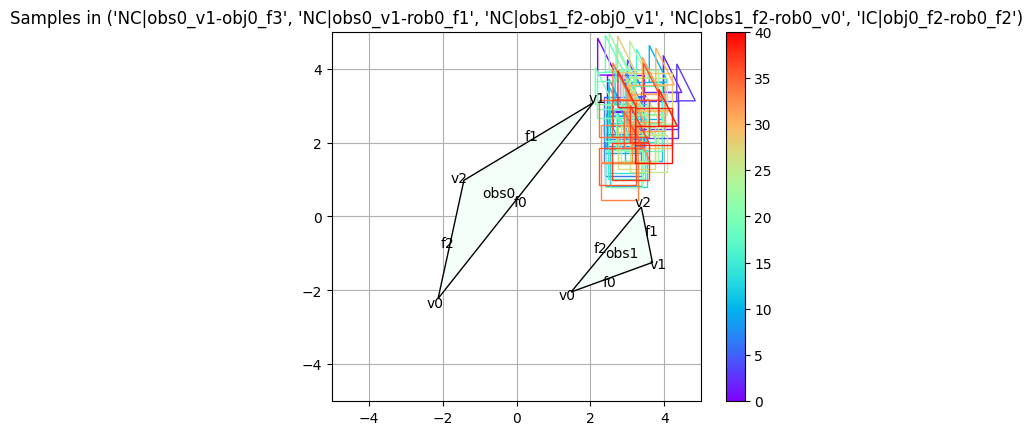

In [103]:
cg.generate_and_plot_samples_in_set(vertex_path[-1], 20)

In [106]:
node = SearchNode(priority=0, vertex_name=cg.source_name, edge_path=[], vertex_path=[cg.source_name], sol=None)
for v in vertex_path[1:]:
    node = SearchNode.from_parent(child_vertex_name=v, parent=node)
node.edge_path
node.vertex_name
# Check that all edges are in the graph
for e_name in node.edge_path:
    assert e_name in cg.edges
cg.set_target(node.vertex_name)
sol = cg.solve_convex_restriction(node.edge_path)
# sol = cg.solve_shortest_path()
print(sol)

is_success: True, cost: 38.8, time: 0.00786, vertex_path: ['source', "('NC|obs0_v0-obj0_f2', 'NC|obs0_f1-rob0_v0', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'NC|obj0_f1-rob0_f1')", "('NC|obs0_v0-obj0_f2', 'NC|obs0_f2-rob0_v0', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'NC|obj0_f1-rob0_f1')", "('NC|obs0_v0-obj0_f2', 'NC|obs0_f2-rob0_v0', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'NC|obj0_f2-rob0_f2')", "('NC|obs0_v0-obj0_f2', 'NC|obs0_v0-rob0_f0', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'NC|obj0_f2-rob0_f2')", "('NC|obs0_v0-obj0_f2', 'NC|obs0_v0-rob0_f0', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'NC|obj0_f3-rob0_v0')", "('NC|obs0_v0-obj0_f2', 'NC|obs0_v0-rob0_f0', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'IC|obj0_f3-rob0_v0')", "('NC|obs0_v0-obj0_f2', 'NC|obs0_v0-rob0_f0', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'IC|obj0_v0-rob0_f0')", "('NC|obs0_v0-obj0_f2', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'IC|obj0_v0-rob0_f0')", "('NC|obs0_f0-obj0_

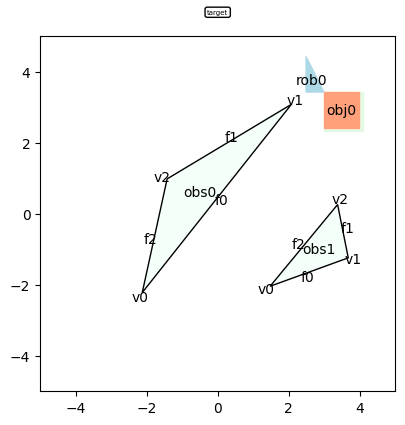

In [107]:
anim = cg.animate_solution()
HTML(anim.to_html5_video())